In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [51]:
data.shape

(200000, 9)

In [60]:
data.dropna(inplace=True)

from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    d_lat = radians(lat2-lat1)
    d_lon = radians(lon2-lon1)
    a = sin(d_lat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(d_lon/2)**2
    c = 2*atan2(sqrt(a), sqrt(1-a))
    return R*c

data['distance_km'] = data.apply(lambda x: 
                                 haversine(x['pickup_latitude'], x['pickup_longitude'], 
                                           x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

data.shape

(199887, 10)

In [53]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,20.855350
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,382.964642
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.215222
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2.120992
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,3.875169
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.239135


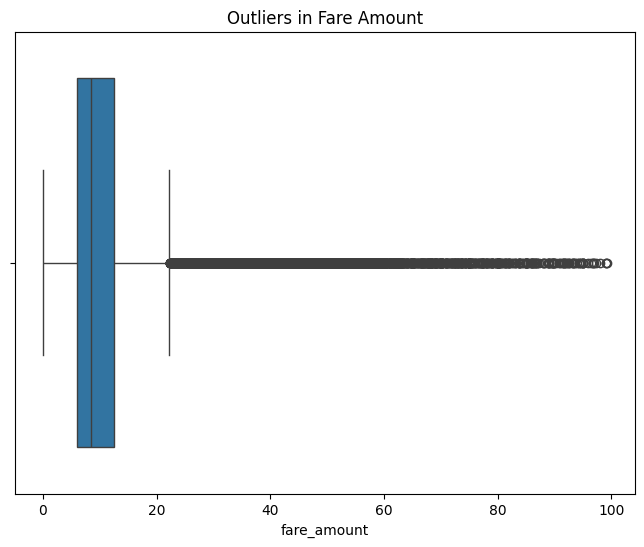

In [58]:
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] < 100)]
plt.figure(figsize=(8,6))
sns.boxplot(x=data['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.show()

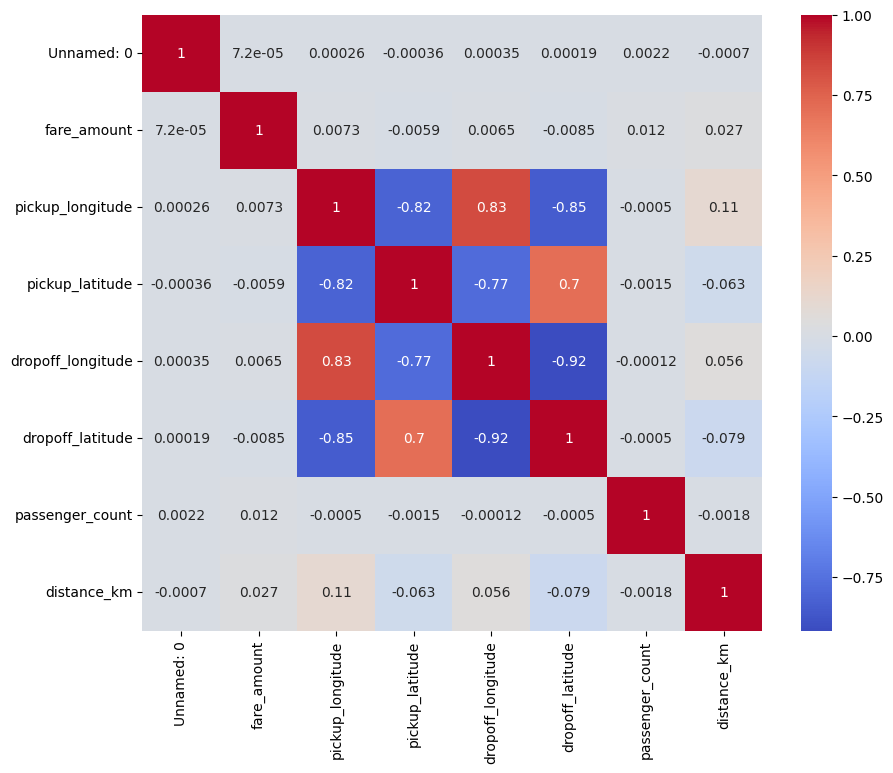

In [12]:
corr = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
x = data[['distance_km']]
y = data['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [16]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [17]:
def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} -> R²: {r2:.3f}, RMSE: {rmse:.3f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Rabdom Forest")

Linear Regression -> R²: 0.001, RMSE: 9.340
Rabdom Forest -> R²: 0.675, RMSE: 5.325


In [18]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2_Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})
print(results)


               Model  R2_Score      RMSE
0  Linear Regression  0.000573  9.340092
1      Random Forest  0.675115  5.325257


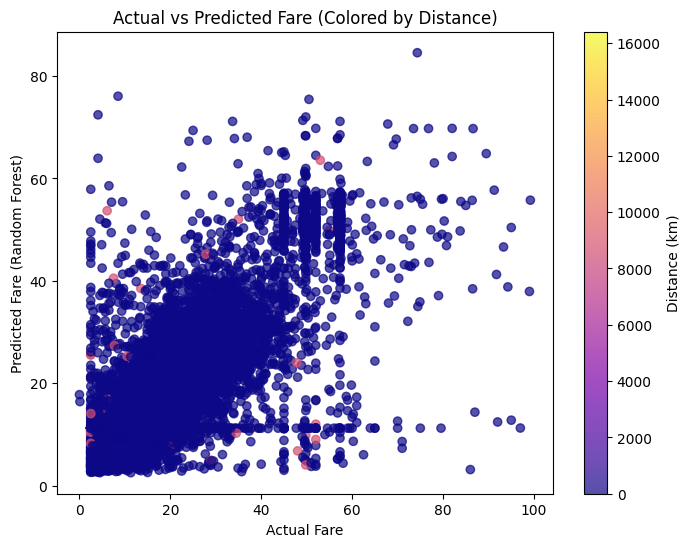

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, 
            c=X_test['distance_km'],   # color points by distance
            cmap='plasma',            # choose colormap: 'coolwarm', 'plasma', etc.
            alpha=0.7)
plt.colorbar(label='Distance (km)')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare (Random Forest)")
plt.title("Actual vs Predicted Fare (Colored by Distance)")
plt.show()


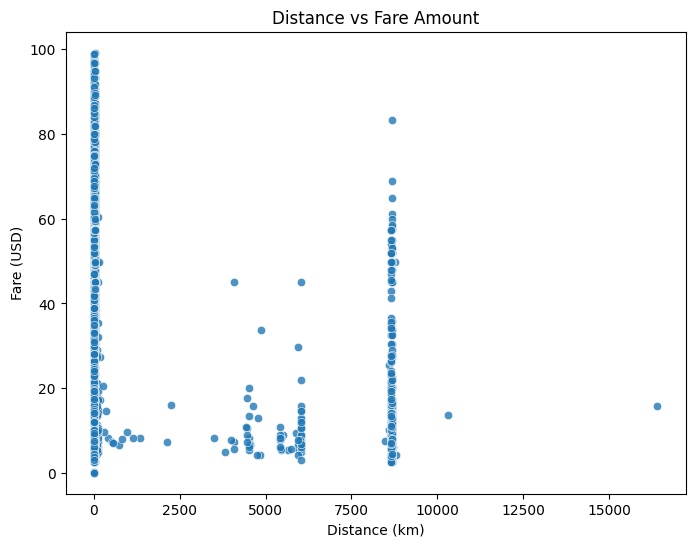

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['distance_km'], y=data['fare_amount'], alpha=0.8)
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare (USD)")
plt.show()


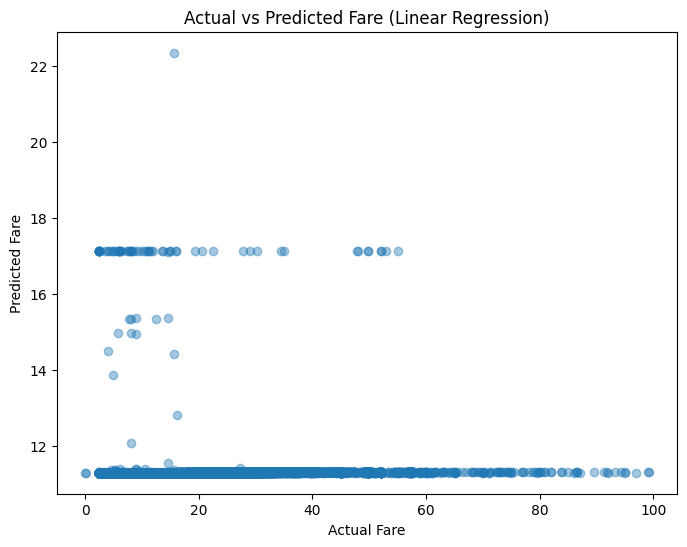

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.4)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare (Linear Regression)")
plt.show()


In [24]:
print("Intercept (b₀):", lin_reg.intercept_)
print("Coefficient for Distance (b₁):", lin_reg.coef_[0])
print(f"Equation: Fare = {lin_reg.intercept_:.2f} + {lin_reg.coef_[0]:.2f} * Distance")


Intercept (b₀): 11.299806516765742
Coefficient for Distance (b₁): 0.0006737922746034946
Equation: Fare = 11.30 + 0.00 * Distance
